In [ ]:
!pip install yolov8


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.4/953.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB

In [ ]:
from ultralytics import YOLO

model = YOLO("/content/best_L.pt")  # load a pretrained model (recommended for training)
# Load an image
img_path = 'threetom.jpeg'  # Make sure this matches the uploaded image's filename


In [ ]:
from ultralytics import YOLO  # Verify the correct package import based on your environment
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

# Assuming 'img_path' and 'model' are defined somewhere above this snippet.
img = Image.open(img_path)

# Run inference (ensure the predict method expects a path and not an image array)
results = model.predict(img_path)

# Visualization (Adjust based on your 'results' format and info)
first_result = results[0]
boxes_data = first_result.boxes.data  # Verify this attribute path is correct for your model's result

# Convert PIL Image to numpy array for compatibility with plotting
orig_img = np.array(img)
cropped_images = []  # List to store cropped images

# Plotting the image without bounding boxes
fig, axs = plt.subplots(1, 2, figsize=(24, 9))
axs[0].imshow(orig_img)
axs[0].set_title("Original Image")

# Plotting the image with bounding boxes and cropping detected objects
for box in boxes_data:
    # Extract values directly from the tensor
    xmin, ymin, xmax, ymax, confidence, class_id = box
    width = xmax - xmin
    height = ymax - ymin

    # Draw rectangle on the image
    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='r', facecolor='none')
    axs[1].add_patch(rect)

    # Crop the detected object
    # Note: Ensure coordinates are within image bounds and are integers
    xmin, ymin, xmax, ymax = map(int, [xmin, ymin, xmax, ymax])
    cropped_img = img.crop((xmin, ymin, xmax, ymax))
    cropped_images.append(cropped_img)

axs[1].imshow(orig_img)
axs[1].set_title("Image with Bounding Boxes")
plt.show()



image 1/1 /content/threetom.jpeg: 800x800 5 Healthy-Leafs, 301.9ms
Speed: 6.3ms preprocess, 301.9ms inference, 1.8ms postprocess per image at shape (1, 3, 800, 800)


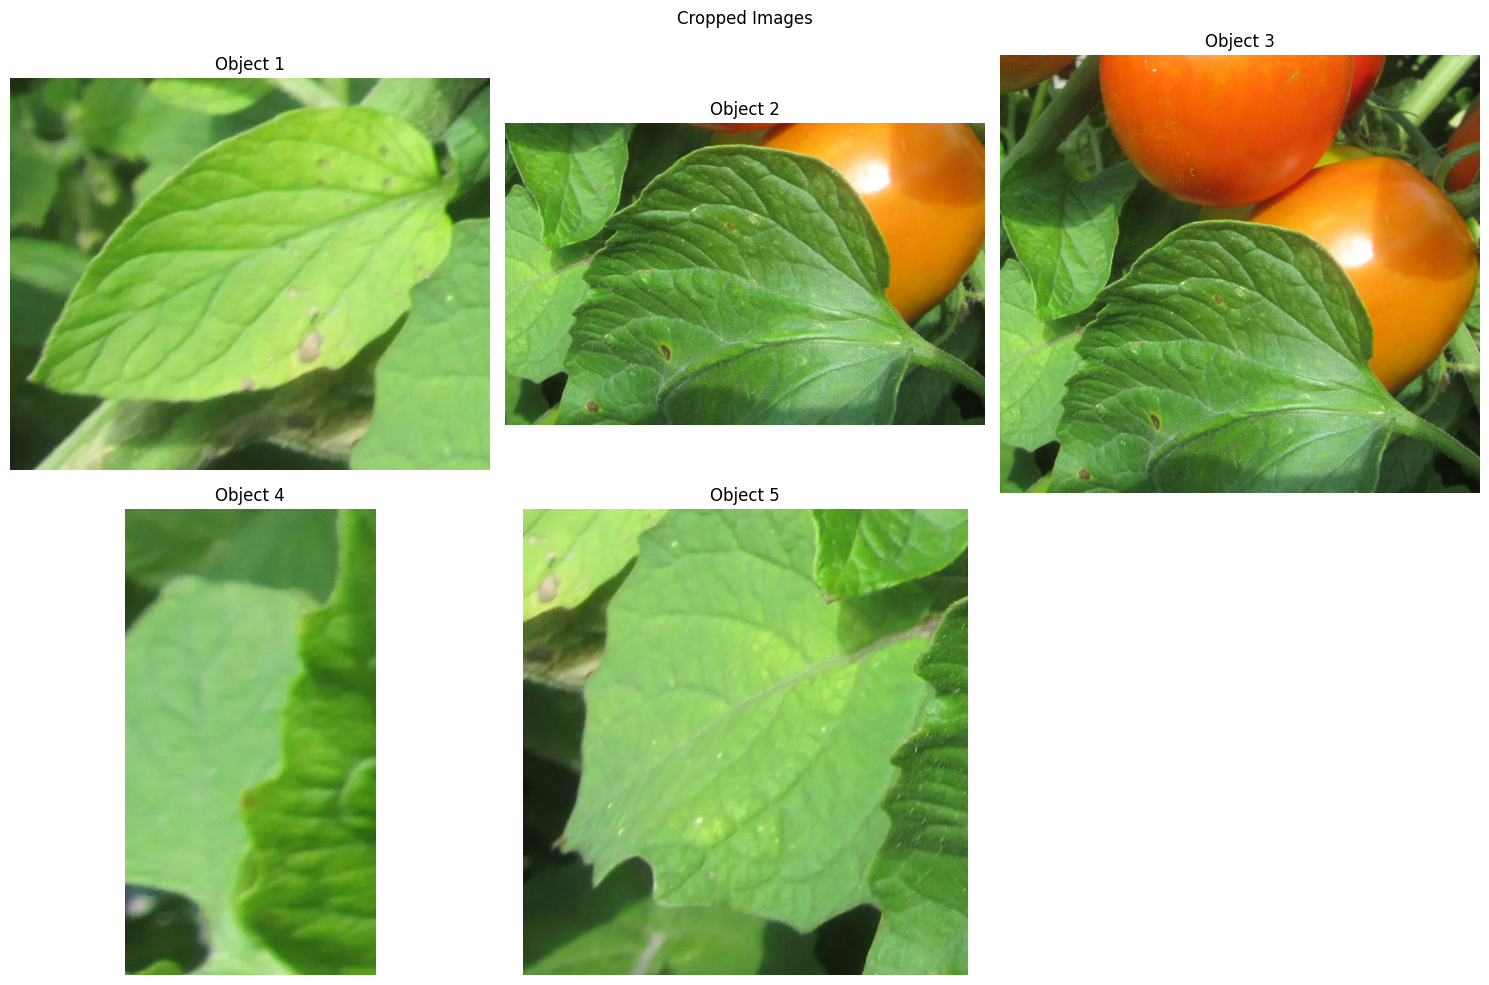

In [ ]:
# Plot all cropped images
n_images = len(cropped_images)
cols = 3  # Number of columns in subplot grid
rows = (n_images + cols - 1) // cols  # Calculate required number of rows

fig, axs = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
fig.suptitle("Cropped Images")

# Flatten the axis array and hide unused subplots
axs = axs.flatten()
for ax in axs[n_images:]:
    ax.axis('off')

# Plot each cropped image
for i, cropped_img in enumerate(cropped_images):
    axs[i].imshow(cropped_img)
    axs[i].set_title(f"Object {i + 1}")
    axs[i].axis('off')  # Hide axes for clarity

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models

# Convert list of images to a NumPy array
def convert_to_array(images):
    return np.array(images)

# Function to resize images using OpenCV
def resize_images(images, new_size=(64, 64)):
    # Ensure images are in a NumPy array for processing
    if isinstance(images, list):
        images = convert_to_array(images)
    resized_images = np.zeros((images.shape[0], new_size[0], new_size[1], images.shape[3]))
    for i in range(images.shape[0]):
        resized_images[i] = cv2.resize(images[i], new_size, interpolation=cv2.INTER_AREA)
    return resized_images

# Define the CNN model
def create_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')  # Assuming 10 classes
    ])
    return model



In [ ]:
model = create_model((64, 64, 3))
model.load_weights('best_model_leaves.keras')

In [ ]:
def process_images(image_list):
    processed_images = []
    for img in image_list:
        # Resize the image to 64x64
        img_resized = img.resize((64, 64))

        # Convert the resized image to a numpy array
        img_array = np.array(img_resized)

        # Ensure the image has 3 channels; some images might be in a different mode
        if img_array.ndim == 2:
            img_array = np.stack((img_array,) * 3, axis=-1)  # Convert grayscale to RGB
        elif img_array.shape[2] == 4:
            img_array = img_array[:, :, :3]  # Convert RGBA to RGB

        processed_images.append(img_array)

    return processed_images
processed_images = process_images(cropped_images)

In [ ]:
def plot_images_with_labels(images, labels):
    num_images = len(images)
    plt.figure(figsize=(10, 2 * num_images))
    for i in range(num_images):
        plt.subplot(num_images, 2, i + 1)
        plt.imshow(images[i])
        plt.title(f"Predicted Label: {labels[i]}")
        plt.axis('off')
    plt.show()

#class_names = {0:'Reject', 1:'Ripe', 2:'Unripe'}
class_names ={0: 'Bacterial_spot',
 1: 'Early_blight',
 2: 'Late_blight',
 3: 'Leaf_Mold',
 4: 'Septoria_leaf_spot',
 5: 'Spider_mites Two-spotted_spider_mite',
 6: 'Target_Spot',
 7: 'Tomato_Yellow_Leaf_Curl_Virus',
 8: 'Tomato_mosaic_virus',
 9: 'healthy'}
# Example images loaded and processed previously
images_batch = np.stack(processed_images)
predictions = model.predict(images_batch)
predicted_labels = np.argmax(predictions, axis=1)
predicted_class_names = [class_names[label] for label in predicted_labels]

# Plot the images with predicted class names
plot_images_with_labels(processed_images, predicted_class_names)

